This is the second fase.
Which is making, training and testing the model.
the data was preprocessed and are saved as .npy files in "processed_data" directory.
To check the preprocessing check the "PreProcessing.ipynb" notebook file.

# imports

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score

# loading the data

Getting the training data. and splitting to train and test

In [3]:
X = np.load("./processed_data/data_train.npy")
y = np.load("./processed_data/labels_train.npy")
print(f"shape of data_train: {X.shape}")
print(f"shape of labels_train: {y.shape}")

shape of data_train: (39209, 30, 30, 3)
shape of labels_train: (39209,)


In [6]:
# splitting the trainig data to train and test parts.
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# making them categorical (dummies or one-hot) 
y_train = to_categorical(y_train,43) 
y_test = to_categorical(y_test,43)
print(y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
(31367, 43) (7842, 43) (30, 30, 3)


# model

Making the CNN model using keras.

In [10]:
# model structure 
model = Sequential()

# input in shape of the train data 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:])) 


model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.25)) 

model.add(Flatten())
model.add(Dense(256, activation='relu')) 
model.add(Dropout(rate=0.5))
 
# output 43 classes 
model.add(Dense(43, activation='softmax'))


In [11]:
# compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 


history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 76s 77ms/step - loss: 2.9452 - accuracy: 0.2334 - val_loss: 1.2660 - val_accuracy: 0.6461
Epoch 2/20
981/981 [==============================] - 77s 78ms/step - loss: 1.2796 - accuracy: 0.6170 - val_loss: 0.6440 - val_accuracy: 0.8231
Epoch 3/20
981/981 [==============================] - 79s 81ms/step - loss: 0.9370 - accuracy: 0.7174 - val_loss: 0.4498 - val_accuracy: 0.8687
Epoch 4/20
981/981 [==============================] - 82s 84ms/step - loss: 0.7340 - accuracy: 0.7810 - val_loss: 0.3310 - val_accuracy: 0.9116
Epoch 5/20
981/981 [==============================] - 81s 82ms/step - loss: 0.5771 - accuracy: 0.8302 - val_loss: 0.2400 - val_accuracy: 0.9320
Epoch 6/20
981/981 [==============================] - 81s 82ms/step - loss: 0.4840 - accuracy: 0.8597 - val_loss: 0.1850 - val_accuracy: 0.9518
Epoch 7/20
981/981 [==============================] - 81s 83ms/step - loss: 0.4303 - accuracy: 0.8763 - val_loss: 0.1687 - val_accuracy:

In [12]:
# saving the trained model
model.save("./models/CNN_Traffic_Sign.h5")

visualising the accuracy and loss during training

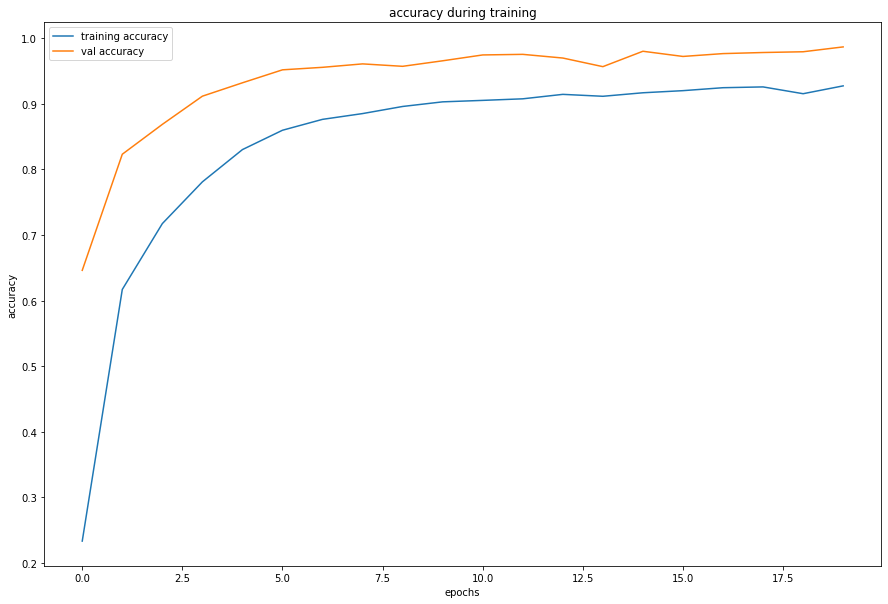

In [15]:
plt.figure(figsize=(15.,10.))
plt.plot(history.history["accuracy"],label="training accuracy")
plt.plot(history.history["val_accuracy"],label="val accuracy")
plt.title("accuracy during training")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

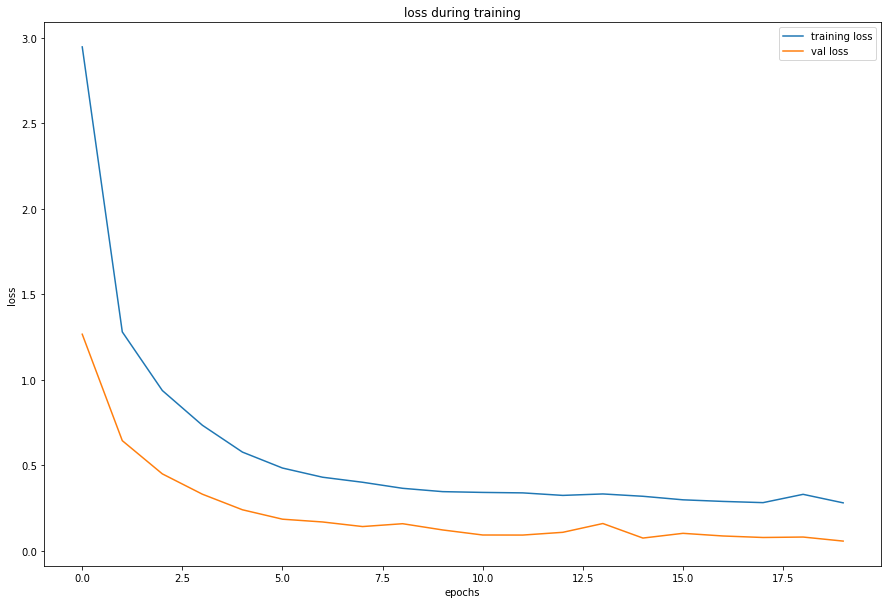

In [17]:
plt.figure(figsize=(15.,10.))
plt.plot(history.history["loss"],label="training loss")
plt.plot(history.history["val_loss"],label="val loss")
plt.title("loss during training")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# testing the model

testing the model with the provded test data.

In [28]:
# load the testing data
X = np.load("./processed_data/data_test.npy")
y = np.load("./processed_data/labels_test.npy")

# getting the highest estimated class of them
# to match the y array and for the accuracy_score function 
y_pred = np.argmax(model.predict(X), axis=1)

print(y.shape, y_pred.shape)

# testing and getting accuracy score
print(accuracy_score(y ,y_pred))

(12630,) (12630,)
0.9492478226444973
